In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats

In [2]:
tweet_data = pd.read_json('tweets_with_polarity.json', orient='records')
tweet_data

city  month  polarity  sentiment  stringency  \
0          London      4  0.108333          1   79.630000   
1          London      4 -0.800000         -1   79.630000   
2          London      4 -0.166667         -1   79.630000   
3          London      4 -0.166667         -1   79.630000   
4          London      4  0.066667          1   79.630000   
...           ...    ...       ...        ...         ...   
366118  Cape Town     11  0.500000          1   39.785667   
366119  Cape Town     11  0.136364          1   39.785667   
366120  Cape Town     11 -0.016667         -1   39.785667   
366121  Cape Town     11  0.500000          1   39.785667   
366122  Cape Town     11  0.000000          0   39.785667   

                                                    tweet  
0       @USAPouncer @Carol61916613 @DebWilliams57 @Chu...  
1       @AmbLiuXiaoMing You lied on Hardtalk China tri...  
2       MADE IN F'ING CHINA! \n\nCoronavirus could lea...  
3       Coronavirus could leave HALF the world's workf...  
4       @lickedspoon Could come in handy if the apocal...  
...                                                   ...  
366118  Surely Covid has cleaned out the sleepy Welsh ...  
366119  HUD has 55 pages of regulations regarding COVI...  
366120  @KOB4 @GovMLG Have you investigated NM Governo...  
366121  We have made the decision to hold off on takin...  
366122  $9\n\nWhen Virona the Corona Came to Town\n\nh...  

[366123 rows x 6 columns]

In [3]:
sentiments = pd.DataFrame()

for city in tweet_data.city.unique():
    for month in tweet_data.month.unique():
        data = tweet_data[(tweet_data['city'] == city) & (tweet_data['month'] == month)]
        values = data.sentiment.value_counts(normalize=True).to_frame().sentiment.unique() * 100
        sentiments = sentiments.append({'city': city, 'month': int(month), 'stringency': data['stringency'].unique()[0], 'positive_percent': values[0], 'negative_percent': values[2], 'polarity': data['polarity'].unique()[0]}, ignore_index=True)

In [4]:
sentiments

city  month  negative_percent  polarity  positive_percent  \
0            London    4.0         19.788021  0.108333         51.904810   
1            London    5.0         22.557744  0.066667         50.484952   
2            London    6.0         19.848015  0.158333         53.794621   
3            London    7.0         21.447855  0.168182         55.494451   
4            London    8.0         22.368065  0.225000         53.315291   
5            London    9.0         22.798414  0.300000         53.203255   
6            London   10.0         24.307569  0.333333         50.894911   
7            London   11.0         21.287871  0.100000         50.174983   
8        Wellington    4.0         22.537746  0.175000         45.095490   
9        Wellington    5.0         26.247375  0.022321         42.385761   
10       Wellington    6.0         26.117388  0.000000         42.855714   
11       Wellington    7.0         26.117388  0.000000         43.835616   
12       Wellington    8.0         27.727227  0.250000         42.935706   
13       Wellington    9.0         26.677332  0.100000         44.795520   
14       Wellington   10.0         26.647335 -0.100000         39.916008   
15       Wellington   11.0         26.957304  0.250000         45.715428   
16        Singapore    4.0         22.547745  0.175000         45.095490   
17        Singapore    5.0         26.267373  0.022321         42.355764   
18        Singapore    6.0         26.127387  0.000000         42.855714   
19        Singapore    7.0         26.107389  0.000000         43.825617   
20        Singapore    8.0         27.737226  0.250000         42.925707   
21        Singapore    9.0         26.677332  0.100000         44.795520   
22        Singapore   10.0         26.637336 -0.100000         39.906009   
23        Singapore   11.0         26.967303  0.250000         45.715428   
24  Washington D.C.    4.0         20.767613  0.337500         50.651945   
25  Washington D.C.    5.0         19.029320 -0.158333         50.853971   
26  Washington D.C.    6.0         23.672231 -0.098990         49.317147   
27  Washington D.C.    7.0         17.208718  0.125000         44.562364   
28  Washington D.C.    8.0         17.675802  0.075000         51.837689   
29  Washington D.C.    9.0         16.862545  0.000000         61.199114   
30  Washington D.C.   10.0         21.635592  0.466667         51.762968   
31  Washington D.C.   11.0         22.571606 -0.600000         53.051059   
32        Cape Town    4.0         22.317768  0.200000         49.135086   
33        Cape Town    5.0         23.807619  0.166667         52.164784   
34        Cape Town    6.0         20.327967  0.000000         52.994701   
35        Cape Town    7.0         23.327667  0.000000         50.244976   
36        Cape Town    8.0         20.477952 -0.200000         50.344966   
37        Cape Town    9.0         24.017598  0.047222         48.435156   
38        Cape Town   10.0         21.627837  0.375000         49.745025   
39        Cape Town   11.0         19.948005  0.000000         48.685131   

    stringency  
0    79.630000  
1    74.225161  
2    70.866000  
3    65.381290  
4    67.636129  
5    65.569333  
6    67.891290  
7    71.666333  
8    95.126667  
9    57.792258  
10   28.027667  
11   22.220000  
12   51.461935  
13   33.978667  
14   24.101290  
15   22.220000  
16   75.373667  
17   82.796452  
18   64.689000  
19   50.000000  
20   50.000000  
21   50.648667  
22   52.241935  
23   51.482667  
24   72.690000  
25   72.690000  
26   70.711333  
27   68.263871  
28   67.130000  
29   64.197667  
30   64.051613  
31   69.628667  
32   87.960000  
33   84.260000  
34   77.715667  
35   79.243548  
36   77.869677  
37   62.034000  
38   39.453871  
39   39.785667

In [5]:
singapore = sentiments[sentiments['city'] == 'Singapore']
london = sentiments[sentiments['city'] == 'London']
cape_town = sentiments[sentiments['city'] == 'Cape Town']
washington_dc = sentiments[sentiments['city'] == 'Washington D.C.']
wellington = sentiments[sentiments['city'] == 'Wellington']

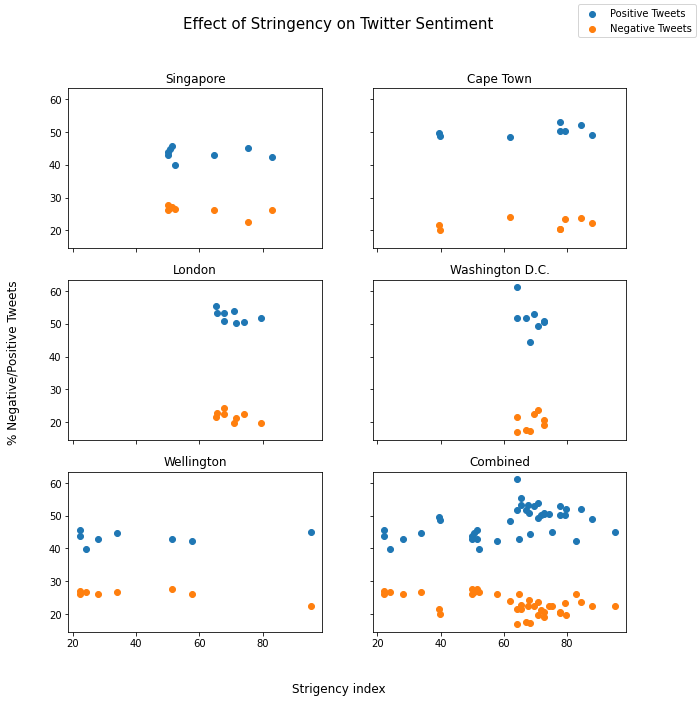

In [6]:
fig, axes = plt.subplots(3,2, sharex=True, sharey=True,  figsize=(10,10))

axes[0][0].scatter(singapore['stringency'], singapore['positive_percent'])
axes[0][0].scatter(singapore['stringency'], singapore['negative_percent'])
axes[0][0].set_title('Singapore')

axes[0][1].scatter(cape_town['stringency'], cape_town['positive_percent'])
axes[0][1].scatter(cape_town['stringency'], cape_town['negative_percent'])
axes[0][1].set_title('Cape Town')

axes[1][0].scatter(london['stringency'], london['positive_percent'])
axes[1][0].scatter(london['stringency'], london['negative_percent'])
axes[1][0].set_title('London')

axes[1][1].scatter(washington_dc['stringency'], washington_dc['positive_percent'])
axes[1][1].scatter(washington_dc['stringency'], washington_dc['negative_percent'])
axes[1][1].set_title('Washington D.C.')

axes[2][0].scatter(wellington['stringency'], wellington['positive_percent'])
axes[2][0].scatter(wellington['stringency'], wellington['negative_percent'])
axes[2][0].set_title('Wellington')

axes[2][1].scatter(sentiments['stringency'], sentiments['positive_percent'], label='Positive Tweets')
axes[2][1].scatter(sentiments['stringency'], sentiments['negative_percent'], label='Negative Tweets')
axes[2][1].set_title('Combined')

handles, labels = axes[2][1].get_legend_handles_labels()

plt.suptitle('Effect of Stringency on Twitter Sentiment',fontsize=15)

fig.text(0.5, 0.04, 'Strigency index', ha='center', fontsize=12)
fig.text(0.04, 0.5, '% Negative/Positive Tweets', va='center', rotation='vertical', fontsize=12)
fig.legend(handles, labels, loc='upper right')
plt.savefig('stringency_sentiment_scatter.png')
plt.show()

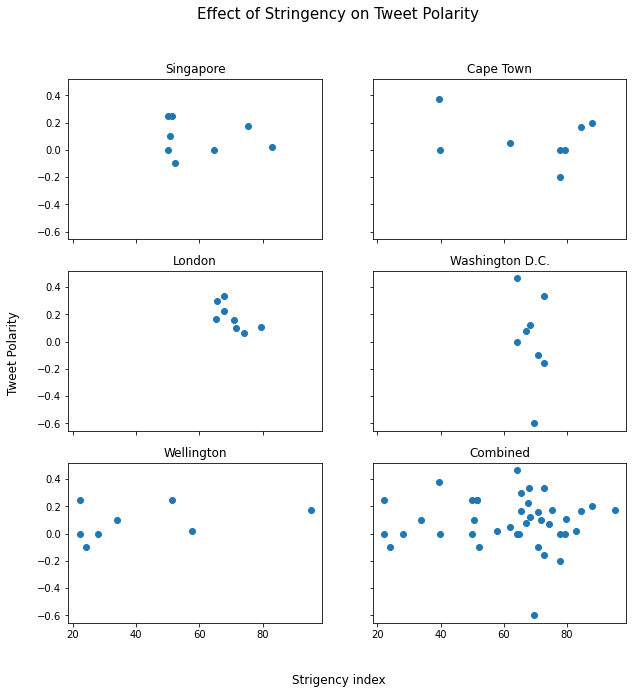

In [7]:
fig, axes = plt.subplots(3,2, sharex=True, sharey=True,  figsize=(10,10))

axes[0][0].scatter(singapore['stringency'], singapore['polarity'])
axes[0][0].set_title('Singapore')

axes[0][1].scatter(cape_town['stringency'], cape_town['polarity'])
axes[0][1].set_title('Cape Town')

axes[1][0].scatter(london['stringency'], london['polarity'])
axes[1][0].set_title('London')

axes[1][1].scatter(washington_dc['stringency'], washington_dc['polarity'])
axes[1][1].set_title('Washington D.C.')

axes[2][0].scatter(wellington['stringency'], wellington['polarity'])
axes[2][0].set_title('Wellington')

axes[2][1].scatter(sentiments['stringency'], sentiments['polarity'])
axes[2][1].set_title('Combined')

plt.suptitle('Effect of Stringency on Tweet Polarity',fontsize=15)

fig.text(0.5, 0.04, 'Strigency index', ha='center', fontsize=12)
fig.text(0.04, 0.5, 'Tweet Polarity', va='center', rotation='vertical', fontsize=12)
plt.savefig('stringency_polarity.png')
plt.show()

In [16]:
data = pd.DataFrame()

slope, intercept, r_value, p_value, std_err = stats.linregress(singapore['stringency'], singapore['positive_percent'])
data = data.append({'city': 'Singapore', 'r_value': r_value, 'p_value': p_value, 'std_err': std_err}, ignore_index=True)

slope, intercept, r_value, p_value, std_err = stats.linregress(cape_town['stringency'], cape_town['positive_percent'])
data = data.append({'city': 'Cape Town', 'r_value': r_value, 'p_value': p_value, 'std_err': std_err}, ignore_index=True)

slope, intercept, r_value, p_value, std_err = stats.linregress(london['stringency'], london['positive_percent'])
data = data.append({'city': 'London', 'r_value': r_value, 'p_value': p_value, 'std_err': std_err}, ignore_index=True)

slope, intercept, r_value, p_value, std_err = stats.linregress(washington_dc['stringency'], washington_dc['positive_percent'])
data = data.append({'city': 'Washington D.C.', 'r_value': r_value, 'p_value': p_value, 'std_err': std_err}, ignore_index=True)

slope, intercept, r_value, p_value, std_err = stats.linregress(wellington['stringency'], wellington['positive_percent'])
data = data.append({'city': 'Wellington', 'r_value': r_value, 'p_value': p_value, 'std_err': std_err}, ignore_index=True)

slope, intercept, r_value, p_value, std_err = stats.linregress(sentiments['stringency'], sentiments['positive_percent'])
data = data.append({'city': 'Combined', 'r_value': r_value, 'p_value': p_value, 'std_err': std_err}, ignore_index=True)

data = data.round(3)
data.to_csv('lin_regress_pos_tweets.csv', index=False)
data

city  p_value  r_value  std_err
0        Singapore    0.941   -0.032    0.058
1        Cape Town    0.227    0.482    0.030
2           London    0.194   -0.512    0.134
3  Washington D.C.    0.247   -0.464    0.492
4       Wellington    0.593    0.225    0.029
5         Combined    0.004    0.448    0.037

In [17]:
data = pd.DataFrame()

slope, intercept, r_value, p_value, std_err = stats.linregress(singapore['stringency'], singapore['negative_percent'])
data = data.append({'city': 'Singapore', 'r_value': r_value, 'p_value': p_value, 'std_err': std_err}, ignore_index=True)

slope, intercept, r_value, p_value, std_err = stats.linregress(cape_town['stringency'], cape_town['negative_percent'])
data = data.append({'city': 'Cape Town', 'r_value': r_value, 'p_value': p_value, 'std_err': std_err}, ignore_index=True)

slope, intercept, r_value, p_value, std_err = stats.linregress(london['stringency'], london['negative_percent'])
data = data.append({'city': 'London', 'r_value': r_value, 'p_value': p_value, 'std_err': std_err}, ignore_index=True)

slope, intercept, r_value, p_value, std_err = stats.linregress(washington_dc['stringency'], washington_dc['negative_percent'])
data = data.append({'city': 'Washington D.C.', 'r_value': r_value, 'p_value': p_value, 'std_err': std_err}, ignore_index=True)

slope, intercept, r_value, p_value, std_err = stats.linregress(wellington['stringency'], wellington['negative_percent'])
data = data.append({'city': 'Wellington', 'r_value': r_value, 'p_value': p_value, 'std_err': std_err}, ignore_index=True)

slope, intercept, r_value, p_value, std_err = stats.linregress(sentiments['stringency'], sentiments['negative_percent'])
data = data.append({'city': 'Combined', 'r_value': r_value, 'p_value': p_value, 'std_err': std_err}, ignore_index=True)

data = data.round(3)
data.to_csv('lin_regress_neg_tweets.csv', index=False)
data

city  p_value  r_value  std_err
0        Singapore    0.120   -0.594    0.039
1        Cape Town    0.405    0.343    0.032
2           London    0.165   -0.542    0.109
3  Washington D.C.    0.428    0.328    0.294
4       Wellington    0.036   -0.740    0.017
5         Combined    0.001   -0.491    0.024

In [15]:
data = pd.DataFrame()

slope, intercept, r_value, p_value, std_err = stats.linregress(singapore['stringency'], singapore['polarity'])
data = data.append({'city': 'Singapore', 'r_value': r_value, 'p_value': p_value, 'std_err': std_err}, ignore_index=True)

slope, intercept, r_value, p_value, std_err = stats.linregress(cape_town['stringency'], cape_town['polarity'])
data = data.append({'city': 'Cape Town', 'r_value': r_value, 'p_value': p_value, 'std_err': std_err}, ignore_index=True)

slope, intercept, r_value, p_value, std_err = stats.linregress(london['stringency'], london['polarity'])
data = data.append({'city': 'London', 'r_value': r_value, 'p_value': p_value, 'std_err': std_err}, ignore_index=True)

slope, intercept, r_value, p_value, std_err = stats.linregress(washington_dc['stringency'], washington_dc['polarity'])
data = data.append({'city': 'Washington D.C.', 'r_value': r_value, 'p_value': p_value, 'std_err': std_err}, ignore_index=True)

slope, intercept, r_value, p_value, std_err = stats.linregress(wellington['stringency'], wellington['polarity'])
data = data.append({'city': 'Wellington', 'r_value': r_value, 'p_value': p_value, 'std_err': std_err}, ignore_index=True)

slope, intercept, r_value, p_value, std_err = stats.linregress(sentiments['stringency'], sentiments['polarity'])
data = data.append({'city': 'Combined', 'r_value': r_value, 'p_value': p_value, 'std_err': std_err}, ignore_index=True)

data = data.round(3)
data.to_csv('lin_regress_polarity.csv', index=False)
data

city  p_value  r_value  std_err
0        Singapore    0.787   -0.115    0.004
1        Cape Town    0.499   -0.282    0.003
2           London    0.061   -0.685    0.006
3  Washington D.C.    0.462   -0.306    0.037
4       Wellington    0.386    0.357    0.002
5         Combined    0.913   -0.018    0.002